In [179]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [180]:
dftrain = pd.read_csv("train_setgeo.csv")

In [181]:
dftest = pd.read_csv("test_setgeo.csv")

In [182]:
warnings.filterwarnings("ignore")

In [183]:
dftrain.duplicated().sum()

0

In [184]:
dftrain.columns

Index(['Gender', 'Motor_licence', 'Bike', 'Skate', 'Hsize', 'Time',
       'Convenience', 'Cost', 'Safety', 'Environment', 'Health', 'Weather',
       'Parking', 'Geodesic_distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 - 60', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 - 2000', 'Income_2000 και άνω',
       'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00', 'Mode'],
      dtype='object')

We will run Variance Inflator frequency to reduce multicollinearity

we will also remove vehicles feature since when it is 0 it introduces bias 

In [185]:
drops = ['Mode', 'Motor_licence']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [186]:
df_with_constant = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable       VIF
0                       const  0.000000
1                      Gender  1.200261
2                        Bike  1.218621
3                       Skate  1.194202
4                       Hsize  1.218463
5                        Time  1.594220
6                 Convenience  1.609249
7                        Cost  1.257896
8                      Safety  2.196465
9                 Environment  1.567117
10                     Health  1.941891
11                    Weather  1.652488
12                    Parking  1.703812
13          Geodesic_distance  1.551927
14            Age_20 και κάτω       inf
15                Age_21 - 30       inf
16                 Age_31 -40       inf
17                Age_41 - 50       inf
18                Age_51 - 60       inf
19             Income_0 - 500       inf
20         Income_1000 - 1500       inf
21         Income_1500 - 2000       inf
22        Income_2000 και άνω       inf
23          Income_500 - 1000       inf


In [187]:
drops = ['Mode', 'Depart_time_06.00 - 09.00', 'Income_500 - 1000', 'Age_21 - 30', 'Motor_licence']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [188]:
df_with_constant = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable        VIF
0                       const  61.192554
1                      Gender   1.200261
2                        Bike   1.218621
3                       Skate   1.194202
4                       Hsize   1.218463
5                        Time   1.594220
6                 Convenience   1.609249
7                        Cost   1.257896
8                      Safety   2.196465
9                 Environment   1.567117
10                     Health   1.941891
11                    Weather   1.652488
12                    Parking   1.703812
13          Geodesic_distance   1.551927
14            Age_20 και κάτω   1.484558
15                 Age_31 -40   1.556857
16                Age_41 - 50   1.564862
17                Age_51 - 60   1.526894
18             Income_0 - 500   1.597713
19         Income_1000 - 1500   1.707686
20         Income_1500 - 2000   1.483369
21        Income_2000 και άνω   1.416523
22  Depart_time_09.00 - 12.00   1.370817
23  Depart_time_

Those will be the final features

In [189]:
drops = ['Mode', 'Depart_time_06.00 - 09.00', 'Income_500 - 1000', 'Age_21 - 30', 'Motor_licence']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [190]:
drops = ['Mode', 'Depart_time_06.00 - 09.00', 'Income_500 - 1000', 'Age_21 - 30', 'Motor_licence']
X_test = dftest.drop(drops, axis=1)
y_test = dftest["Mode"]

In [191]:
undersampler = RandomUnderSampler(sampling_strategy={0: 73}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [192]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    73
1    73
2    71
Name: count, dtype: int64

Class counts in y_test:
Mode
0    54
2    48
1    48
Name: count, dtype: int64


In [193]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((217, 25), (217,), (150, 25), (150,))

# Logistic Regression

In [194]:
log_reg=LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.93      0.90      0.92        73
           2       0.88      0.92      0.90        71

    accuracy                           0.92       217
   macro avg       0.92      0.92      0.92       217
weighted avg       0.92      0.92      0.92       217



In [195]:
y_pred_log = log_reg.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.77      0.83      0.80        48
           2       0.81      0.81      0.81        48

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



In [196]:
coefficients = log_reg.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                  0         1         2
Gender                    -0.455567  0.887345 -0.401100
Bike                      -0.678944 -0.036889  0.152845
Skate                     -0.291073 -1.222445  0.844571
Hsize                      0.096913  0.306531 -0.050548
Time                      -0.167858  0.143446 -0.018981
Convenience                0.806159 -0.950756  0.040978
Cost                      -0.668320  0.741273 -0.187887
Safety                    -0.013695  0.223208 -0.494945
Environment                0.210877  0.047314 -0.133772
Health                    -0.446699 -1.236609  1.395931
Weather                   -0.074200 -0.954505  0.790086
Parking                    0.353749 -0.153381 -0.090652
Geodesic_distance          0.496075 -0.316848 -0.300993
Age_20 και κάτω           -0.722339 -0.083175  0.374756
Age_31 -40                 0.535201 -0.188867 -0.369248
Age_41 - 50                0.546678  0.022917 -0.295346
Age_51 - 60        

In [197]:
odds = np.exp(coefficients)
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)
coefficients_df = coefficients_df.transpose()
coefficients_df.columns = [f'Class_{i+1}' for i in range(coefficients_df.shape[1])]
odds_df = pd.DataFrame(odds, columns=X_train.columns)
odds_df = odds_df.transpose()
odds_df.columns = [f'Class_{i+1}' for i in range(odds_df.shape[1])] 
print("Coefficients for each class:")
print(coefficients_df)
print("\nOdds for each class:")
print(odds_df)

Coefficients for each class:
                            Class_1   Class_2   Class_3
Gender                    -0.455567  0.887345 -0.401100
Bike                      -0.678944 -0.036889  0.152845
Skate                     -0.291073 -1.222445  0.844571
Hsize                      0.096913  0.306531 -0.050548
Time                      -0.167858  0.143446 -0.018981
Convenience                0.806159 -0.950756  0.040978
Cost                      -0.668320  0.741273 -0.187887
Safety                    -0.013695  0.223208 -0.494945
Environment                0.210877  0.047314 -0.133772
Health                    -0.446699 -1.236609  1.395931
Weather                   -0.074200 -0.954505  0.790086
Parking                    0.353749 -0.153381 -0.090652
Geodesic_distance          0.496075 -0.316848 -0.300993
Age_20 και κάτω           -0.722339 -0.083175  0.374756
Age_31 -40                 0.535201 -0.188867 -0.369248
Age_41 - 50                0.546678  0.022917 -0.295346
Age_51 - 60        

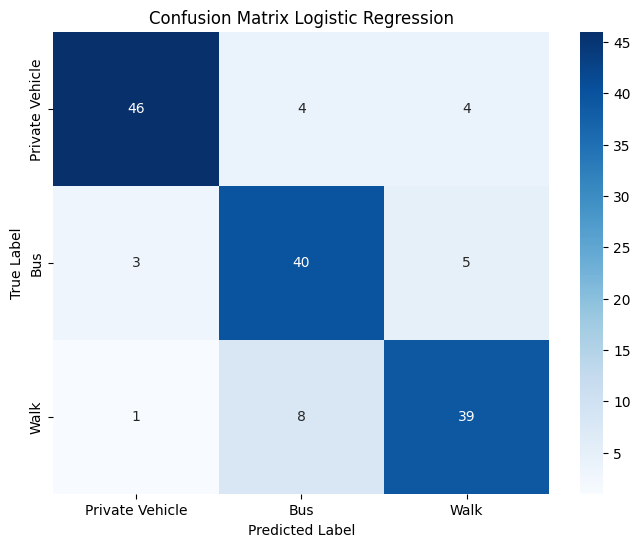

In [198]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [199]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

In [200]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_test_bin = label_binarizer.transform(y_test)
classes = label_binarizer.classes_

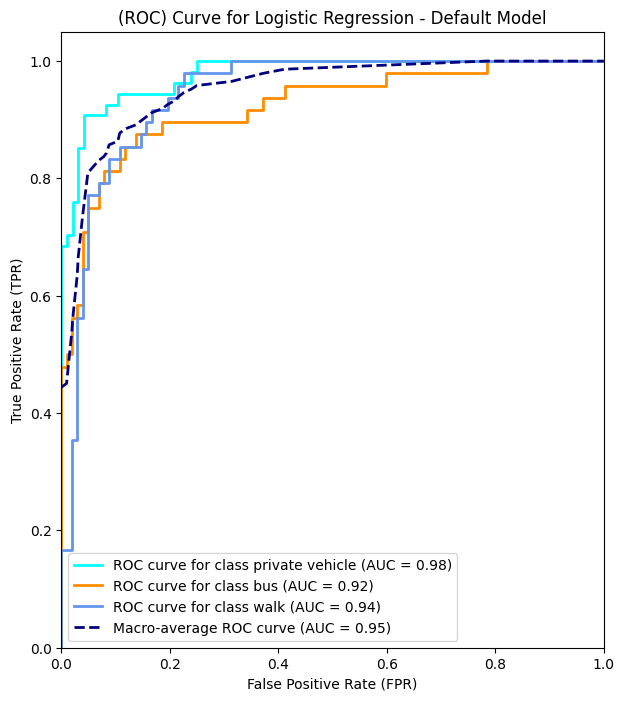

In [201]:
class_probabilities_log = log_reg.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Logistic Regression - Default Model")

plt.show()

In [202]:
roc_auc["macro"]

0.9518768155410312

In [203]:
logreg_model=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.92      0.90      0.91        73
           2       0.89      0.90      0.90        71

    accuracy                           0.91       217
   macro avg       0.91      0.91      0.91       217
weighted avg       0.91      0.91      0.91       217



In [204]:
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        54
           1       0.79      0.85      0.82        48
           2       0.82      0.83      0.82        48

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [205]:
coefficients = logreg_model.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                  0         1         2
Gender                    -0.457470  0.957762 -0.506844
Bike                      -0.697518 -0.095855  0.234588
Skate                     -0.292886 -1.090482  0.839110
Hsize                      0.072044  0.359327 -0.223934
Time                      -0.171071  0.150267 -0.023418
Convenience                0.775622 -0.803588 -0.123037
Cost                      -0.690763  0.795130 -0.274559
Safety                    -0.032205  0.257562 -0.387584
Environment                0.224813  0.112275 -0.062999
Health                    -0.462269 -1.165347  1.254083
Weather                   -0.086771 -0.891887  0.648805
Parking                    0.360241 -0.152804 -0.112102
Geodesic_distance          0.496999 -0.300745 -0.321087
Age_20 και κάτω           -0.737397 -0.058519  0.317695
Age_31 -40                 0.523889 -0.044419 -0.629982
Age_41 - 50                0.577931  0.032983 -0.263350
Age_51 - 60        

In [206]:
odds = np.exp(coefficients)
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)
coefficients_df = coefficients_df.transpose()
coefficients_df.columns = [f'Class_{i+1}' for i in range(coefficients_df.shape[1])]
odds_df = pd.DataFrame(odds, columns=X_train.columns)
odds_df = odds_df.transpose()
odds_df.columns = [f'Class_{i+1}' for i in range(odds_df.shape[1])] 
print("Coefficients for each class:")
print(coefficients_df)
print("\nOdds for each class:")
print(odds_df)

Coefficients for each class:
                            Class_1   Class_2   Class_3
Gender                    -0.457470  0.957762 -0.506844
Bike                      -0.697518 -0.095855  0.234588
Skate                     -0.292886 -1.090482  0.839110
Hsize                      0.072044  0.359327 -0.223934
Time                      -0.171071  0.150267 -0.023418
Convenience                0.775622 -0.803588 -0.123037
Cost                      -0.690763  0.795130 -0.274559
Safety                    -0.032205  0.257562 -0.387584
Environment                0.224813  0.112275 -0.062999
Health                    -0.462269 -1.165347  1.254083
Weather                   -0.086771 -0.891887  0.648805
Parking                    0.360241 -0.152804 -0.112102
Geodesic_distance          0.496999 -0.300745 -0.321087
Age_20 και κάτω           -0.737397 -0.058519  0.317695
Age_31 -40                 0.523889 -0.044419 -0.629982
Age_41 - 50                0.577931  0.032983 -0.263350
Age_51 - 60        

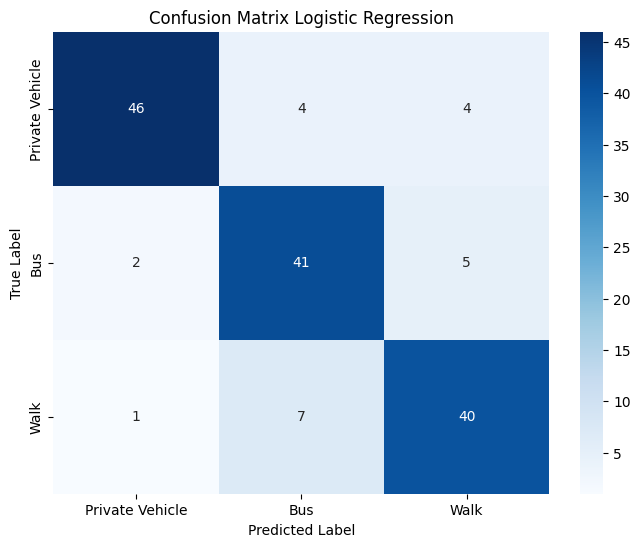

In [207]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

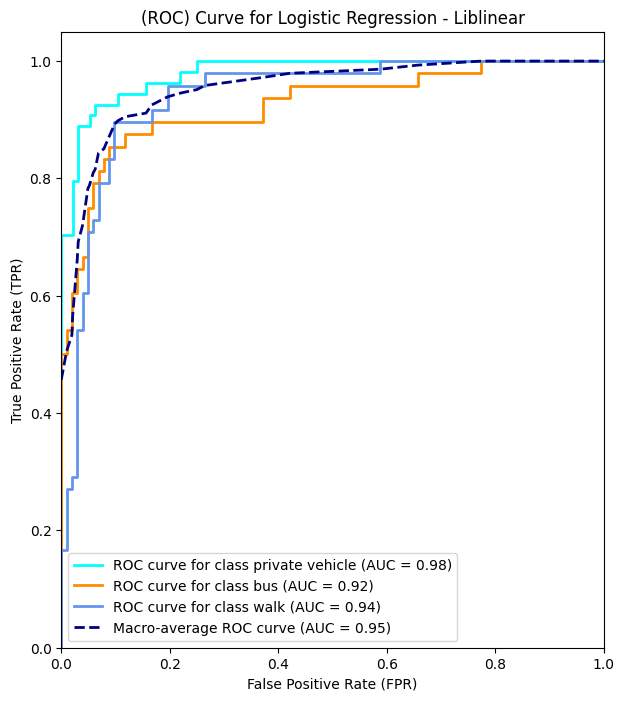

In [208]:
class_probabilities_log = logreg_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Logistic Regression - Liblinear")

plt.show()

In [209]:
roc_auc["macro"]

0.9522666367858871

# Decision tree

In [217]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

11

In [218]:
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        71

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



In [219]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        54
           1       0.78      0.75      0.77        48
           2       0.75      0.75      0.75        48

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



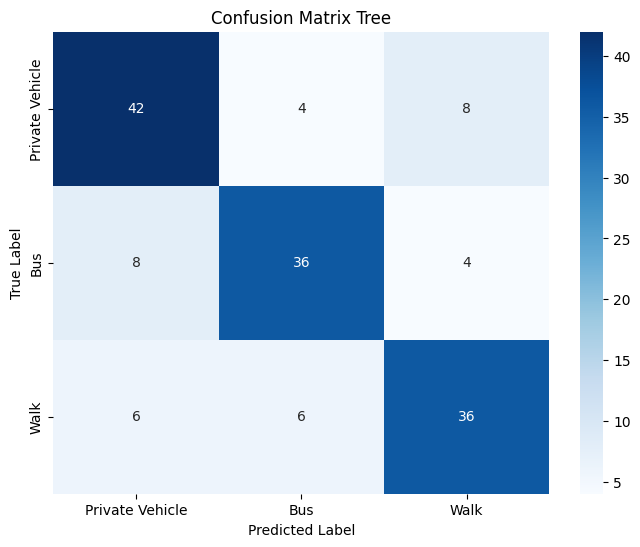

In [220]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [228]:
param_grid = {
    'max_depth': list(range(2, 12))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

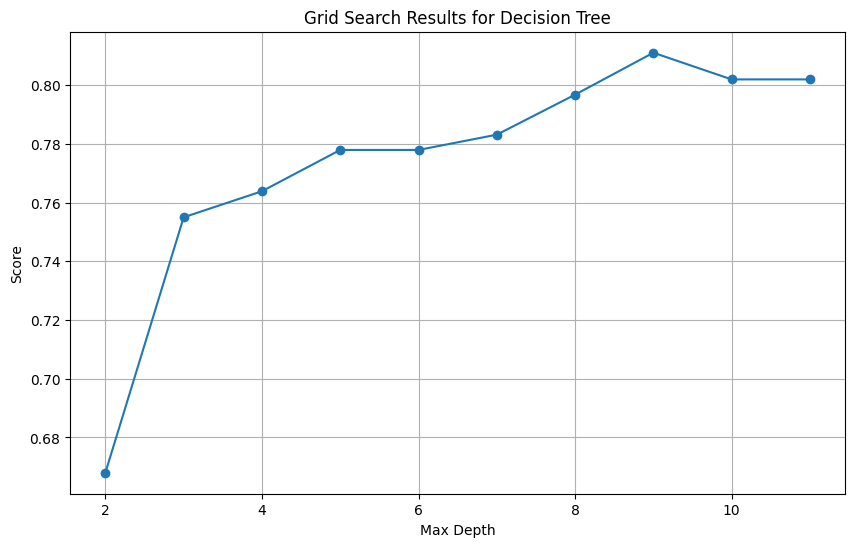

In [229]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [223]:
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [1, 2, 3, 4,  5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [224]:
bestp = grid_search_dt.best_params_
bestp

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [225]:
score = grid_search_dt.best_score_
score

0.8196969696969697

In [230]:
tree=grid_search_dt.best_estimator_
y_pred_log = tree.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Tree_Report:', Log_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.96      1.00      0.98        73
           2       1.00      0.99      0.99        71

    accuracy                           0.99       217
   macro avg       0.99      0.99      0.99       217
weighted avg       0.99      0.99      0.99       217



In [231]:
y_pred_tree = tree.predict(X_test)
tree_Report = classification_report(y_test, y_pred_tree)
print('Tree_Report:', tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        54
           1       0.75      0.75      0.75        48
           2       0.80      0.75      0.77        48

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



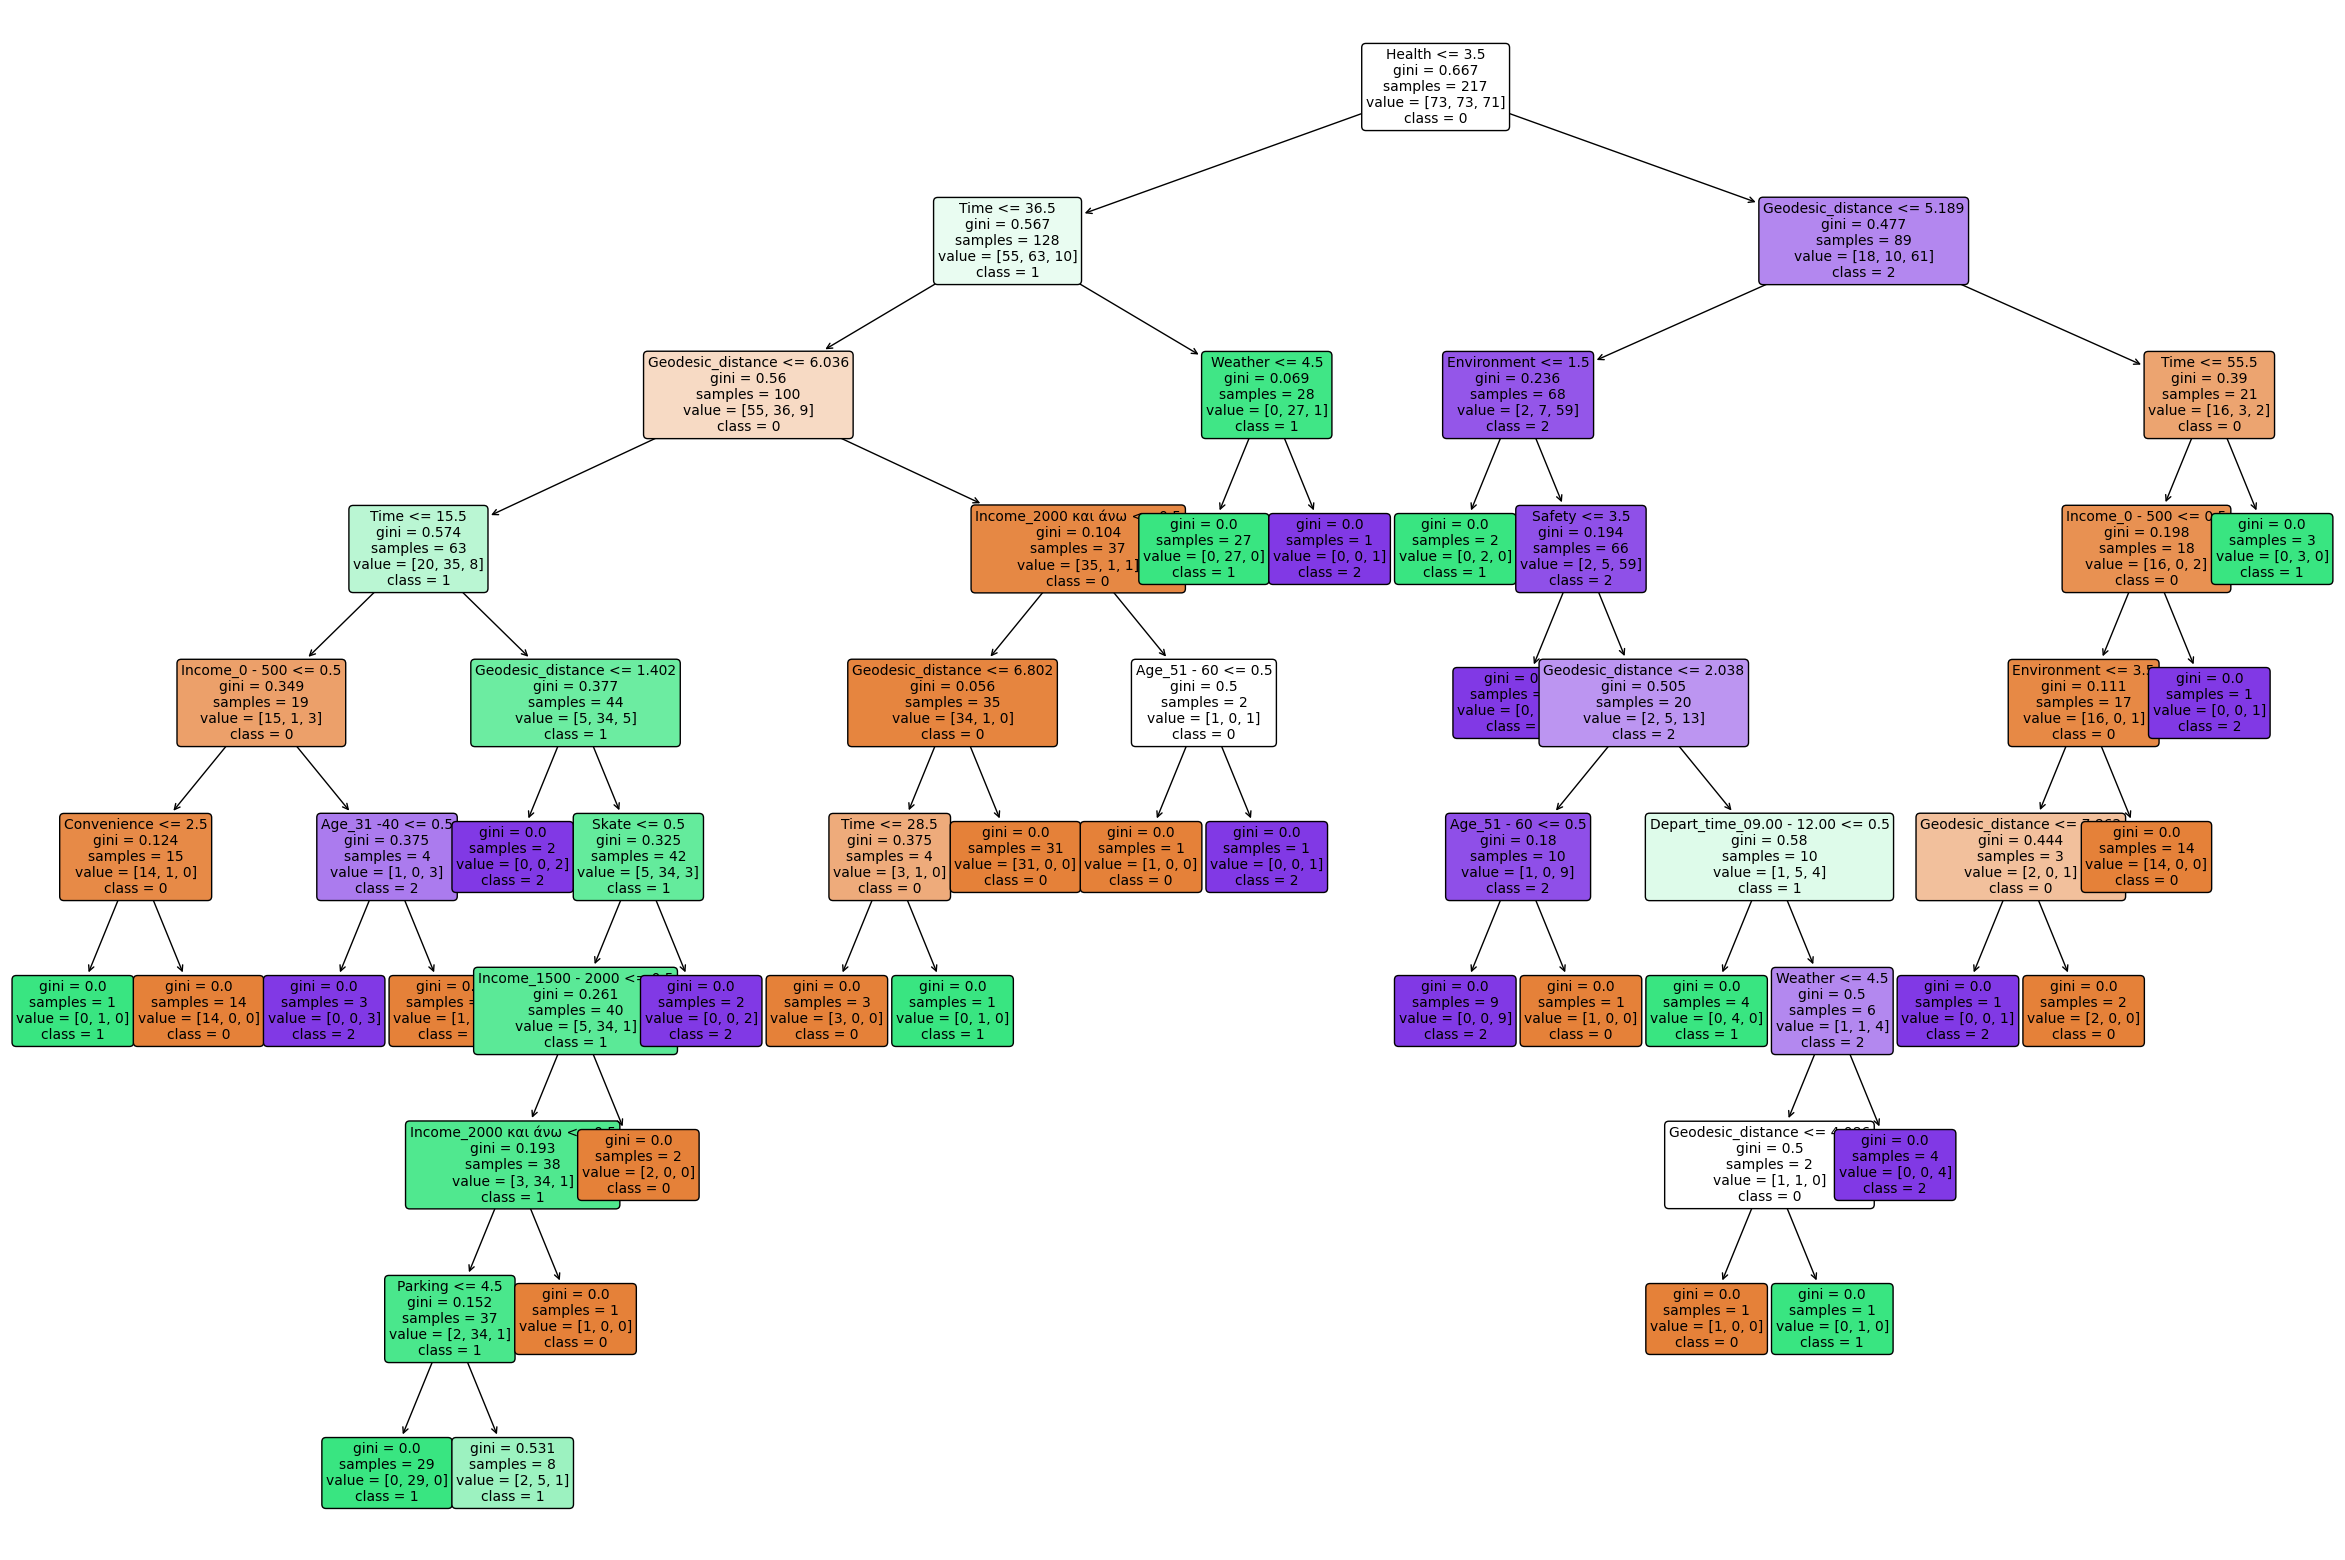

In [232]:
plt.figure(figsize=(30, 20))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], rounded=True, fontsize=10)
plt.show()

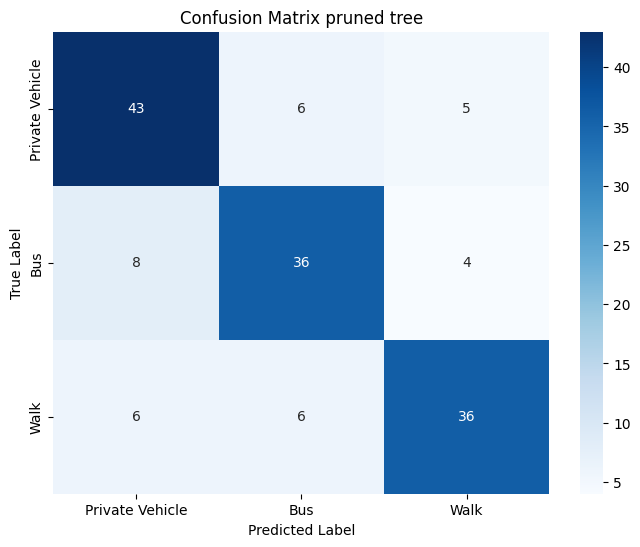

In [233]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [234]:
X_train.columns

Index(['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00'],
      dtype='object')

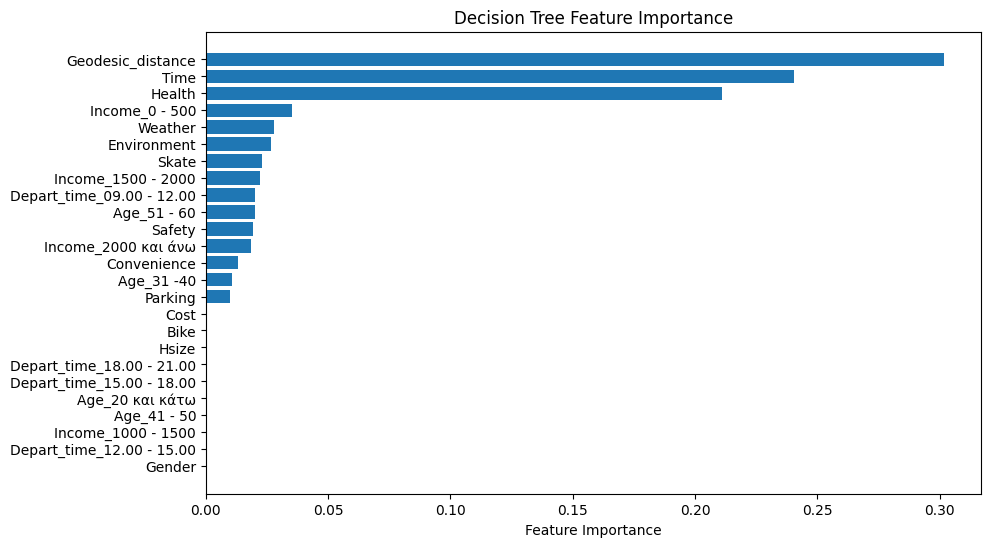

In [235]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [236]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

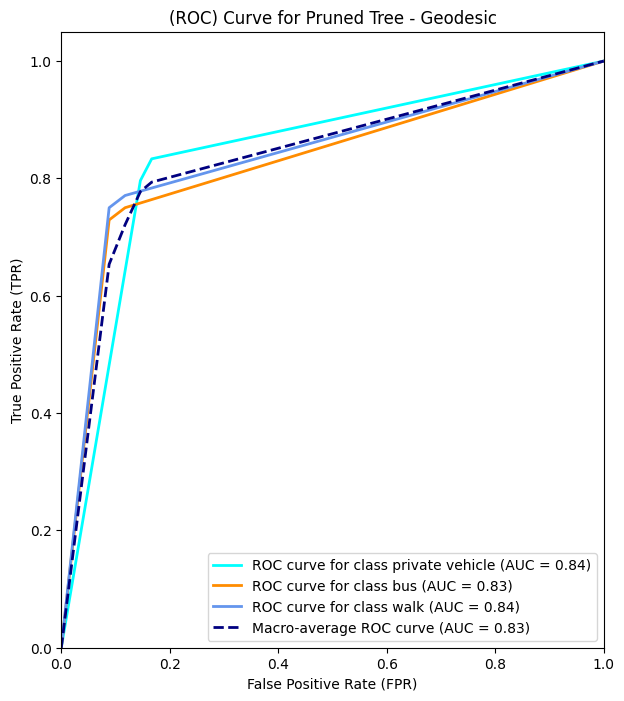

In [237]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(tree.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(tree.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(tree.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(tree.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Pruned Tree - Geodesic")

plt.show()

In [238]:
roc_auc["macro"]

0.8338704308884048

# Random Forest

In [239]:
X_train.shape, X_test.shape

((217, 25), (150, 25))

In [240]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_pred_rf_basic = rf_model.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        71

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



In [241]:
y_pred_rf_basic = rf_model.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
confm = confusion_matrix(y_test, y_pred_rf_basic)
print(reportrfbasic)
print(confm)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        54
           1       0.89      0.81      0.85        48
           2       0.83      0.83      0.83        48

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150

[[47  3  4]
 [ 5 39  4]
 [ 6  2 40]]


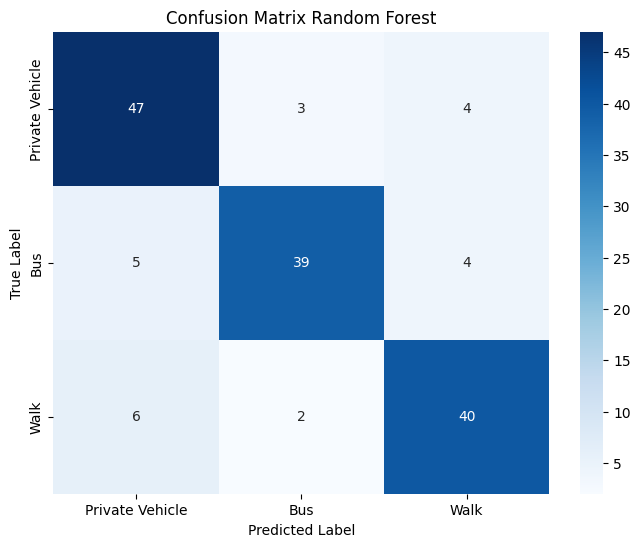

In [242]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [243]:
param_grid = {
    'max_features': range(2, 26)
}

rf_model = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 14}


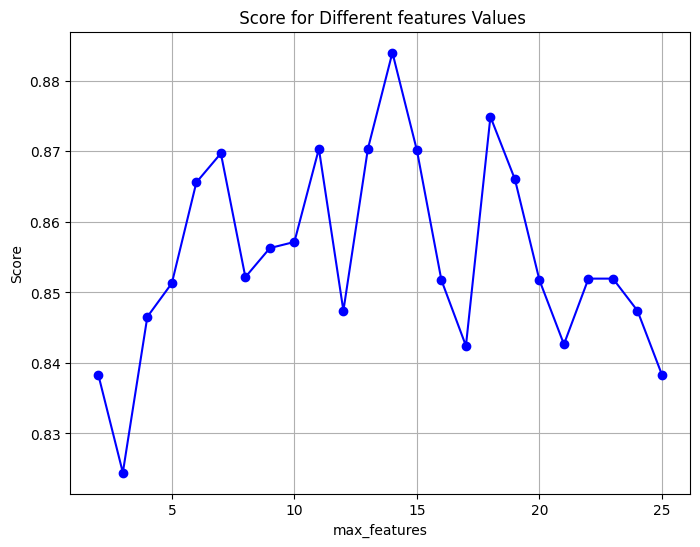

In [244]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [245]:
param_grid = {
    'n_estimators': list(range(50, 301))}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 60}


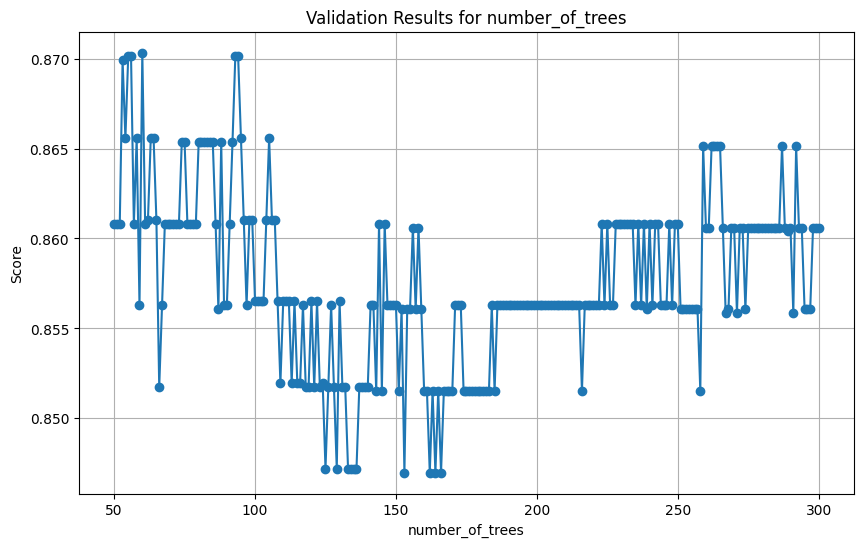

In [246]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [259]:
param_grid = {
    'n_estimators': list(range(50, 101)),
    'max_features': [6, 11, 13, 14]}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 14, 'n_estimators': 50}


In [260]:
score = grid_search.best_score_
score

0.8889610389610392

In [261]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        71

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



In [262]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        54
           1       0.90      0.79      0.84        48
           2       0.82      0.83      0.82        48

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



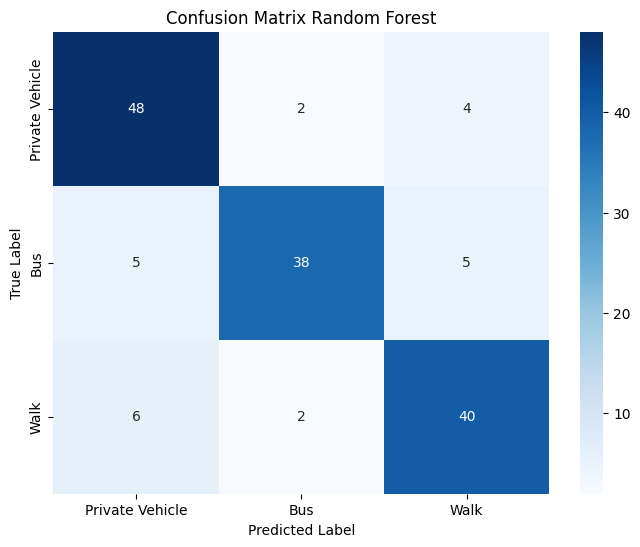

In [263]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [264]:
X_train.columns

Index(['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00'],
      dtype='object')

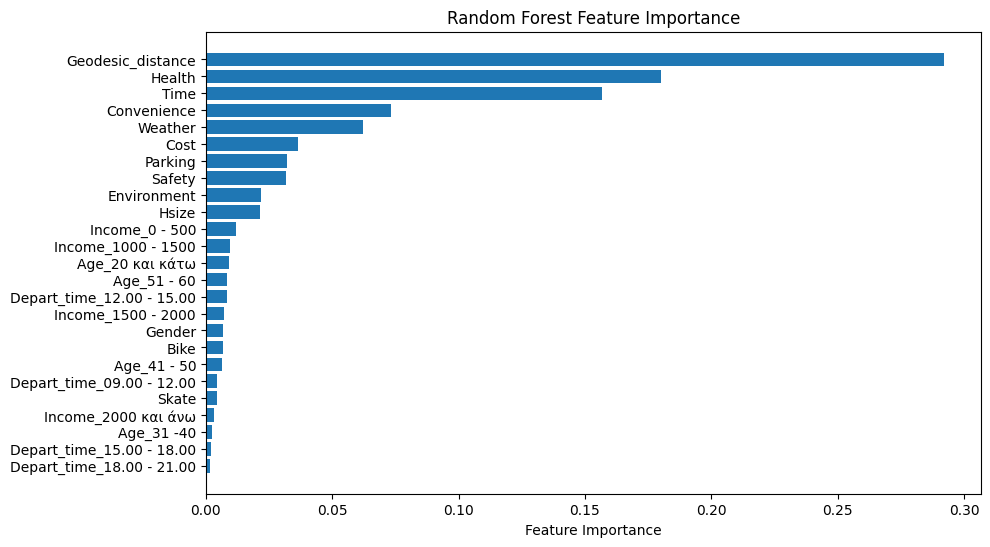

In [265]:
feature_importances = random_forest.feature_importances_

feature_names = ['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

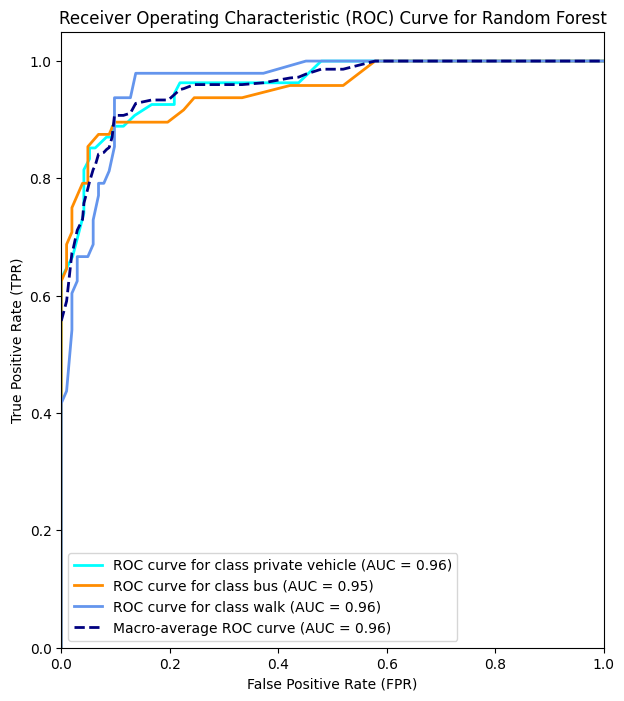

In [266]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(random_forest.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(random_forest.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(random_forest.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(random_forest.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Random Forest")

plt.show()

In [267]:
roc_auc['macro']

0.9573035811546841

# XGBoost

In [268]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [269]:
xgb_classifier.fit(X_train, y_train)
y_pred_test = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        54
           1       0.91      0.85      0.88        48
           2       0.88      0.94      0.91        48

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



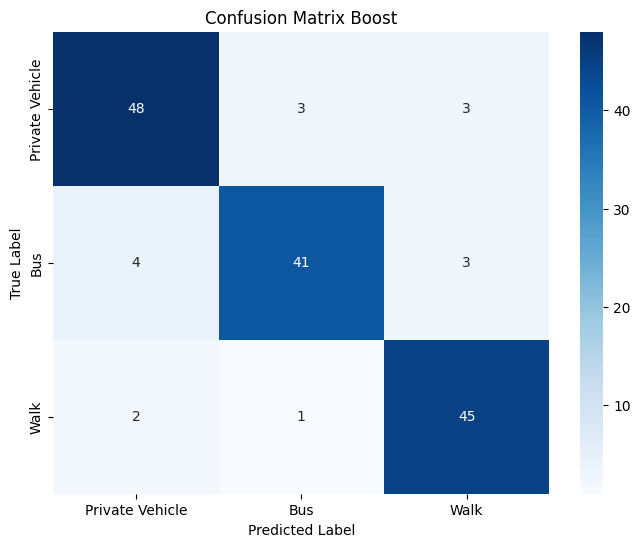

In [270]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

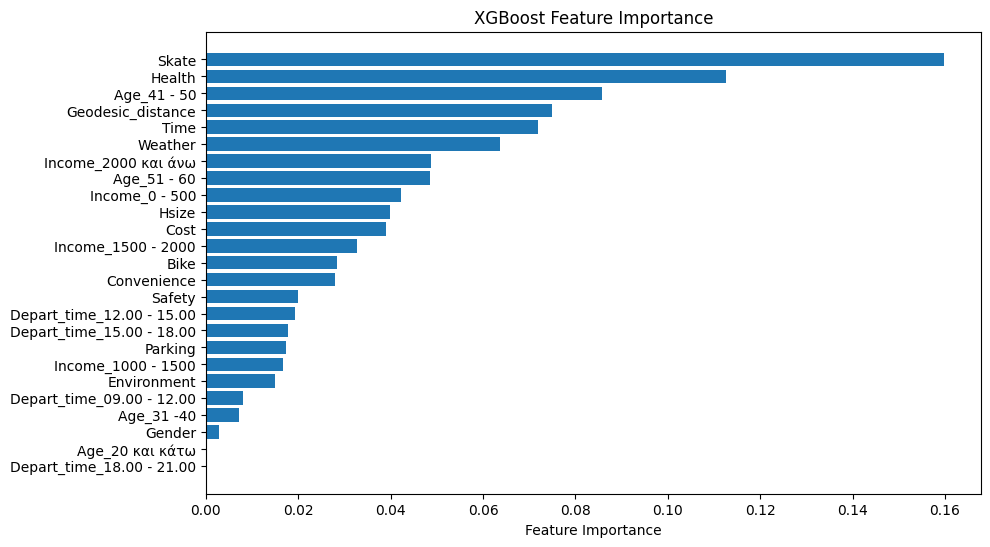

In [272]:
feature_importances = xgb_classifier.feature_importances_

feature_names = ['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [273]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [274]:
param_grid = {
    'n_estimators': list(range(50, 301)),
}

In [275]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

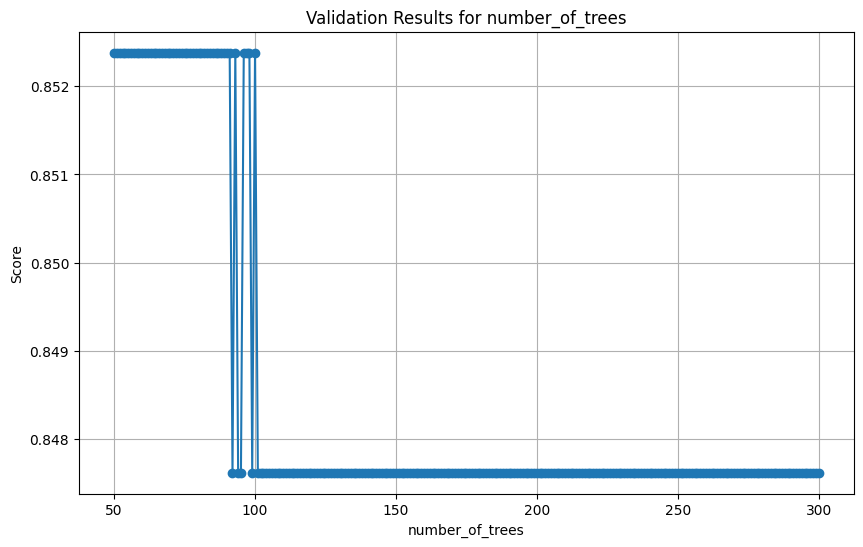

In [276]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [277]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [278]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

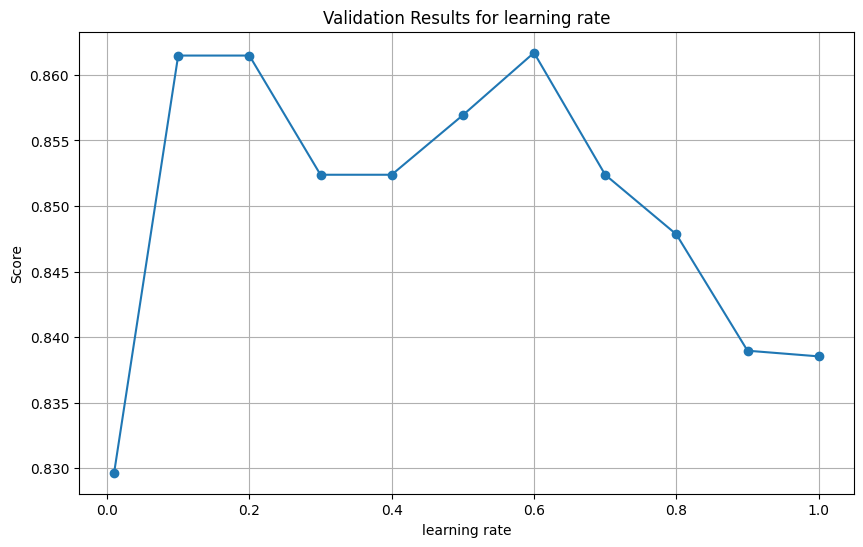

In [279]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

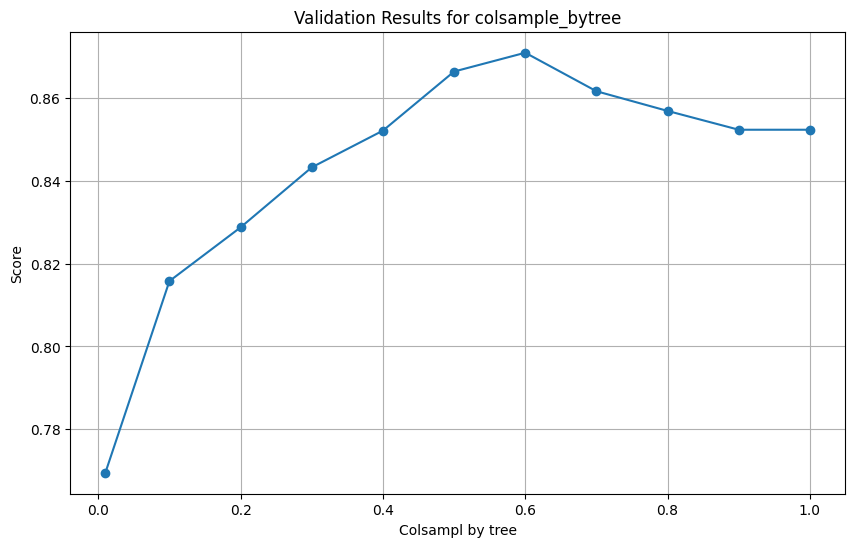

In [280]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

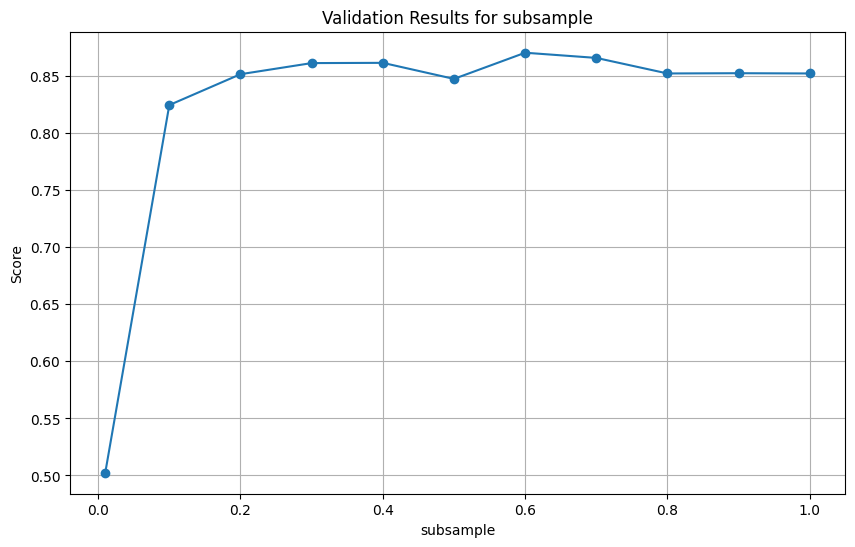

In [281]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

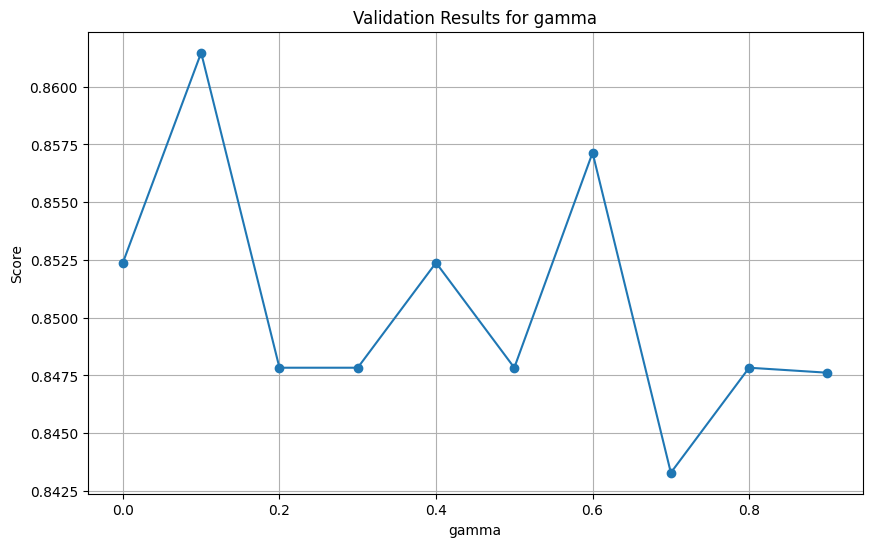

In [282]:
param_grid = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_gamma']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.title('Validation Results for gamma')
plt.grid(True)
plt.show()

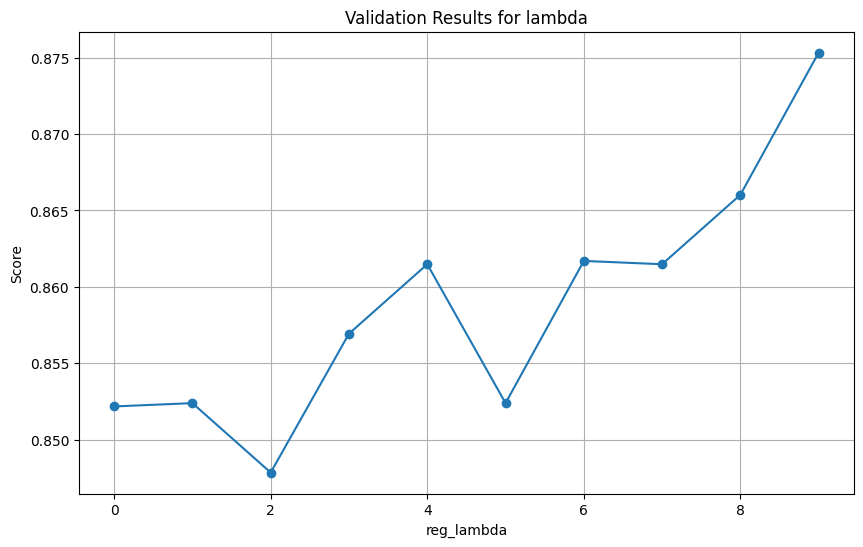

In [283]:
param_grid = {
    'reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_reg_lambda']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('reg_lambda')
plt.ylabel('Score')
plt.title('Validation Results for lambda')
plt.grid(True)
plt.show()

In [308]:
param_grid = {
    'n_estimators' : list(range(50, 101)),
    'gamma' : [3],
    'reg_lambda' : [9],
    'subsample': [0.6],
    'colsample_bytree' : [0.6],
    'learning_rate': [0.1, 0.2]}

In [309]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.6, 'gamma': 3, 'learning_rate': 0.2, 'n_estimators': 84, 'reg_lambda': 9, 'subsample': 0.6}


In [310]:
best_model = grid_search.best_estimator_

In [311]:
best_score = grid_search.best_score_
best_score

0.8333333333333334

In [312]:
y_pred_test = best_model.predict(X_train)
xgbreport = classification_report(y_train, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        73
           1       0.91      0.88      0.90        73
           2       0.85      0.85      0.85        71

    accuracy                           0.88       217
   macro avg       0.88      0.88      0.88       217
weighted avg       0.89      0.88      0.88       217



In [313]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        54
           1       0.83      0.79      0.81        48
           2       0.85      0.81      0.83        48

    accuracy                           0.83       150
   macro avg       0.83      0.82      0.83       150
weighted avg       0.83      0.83      0.83       150



In [314]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

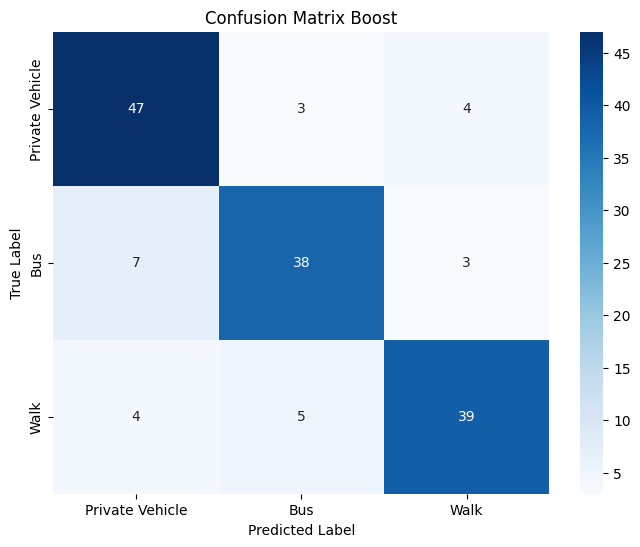

In [315]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

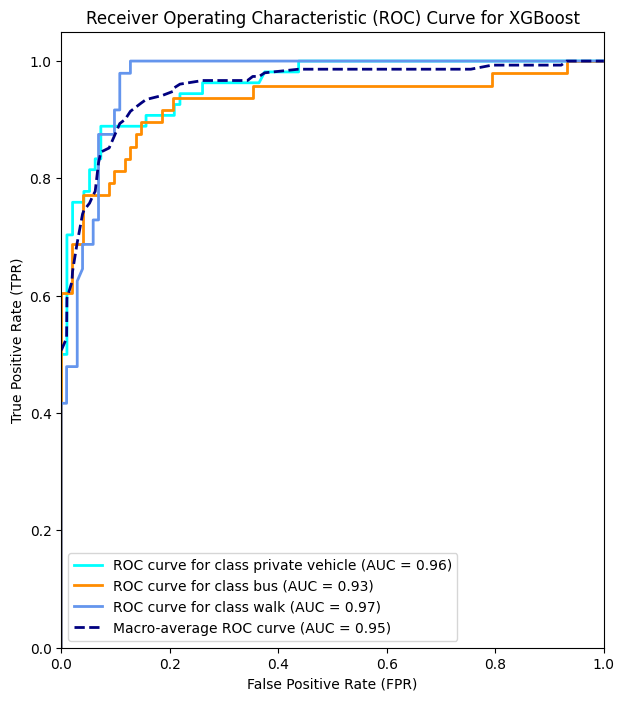

In [316]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(best_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(best_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(best_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(best_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for XGBoost")

plt.show()

In [317]:
roc_auc['macro']

0.9534417740861777

In [318]:
X_train.columns

Index(['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00'],
      dtype='object')

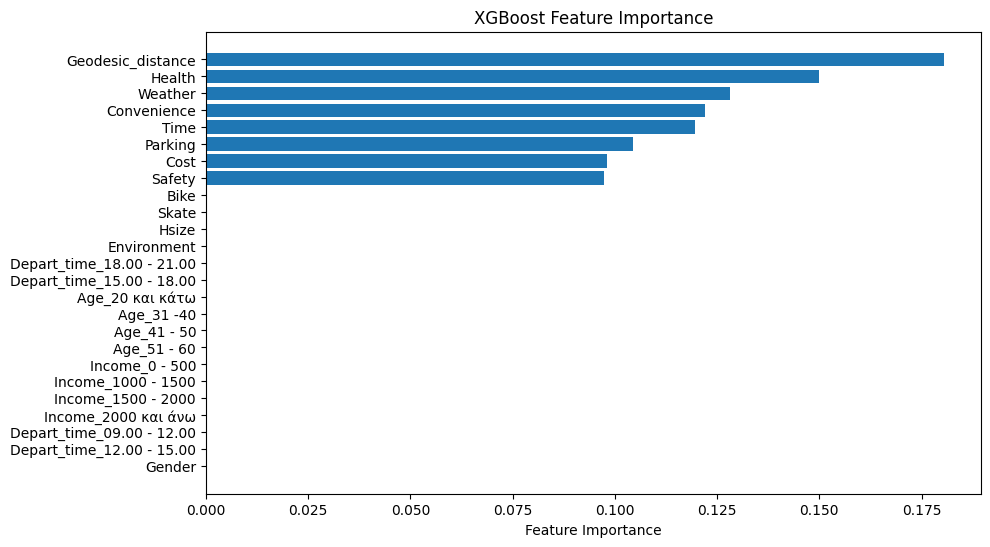

In [320]:
feature_importances = best_model.feature_importances_

feature_names = ['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Model Stack

In [321]:
X_train.columns

Index(['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 - 60', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 - 2000', 'Income_2000 και άνω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_15.00 - 18.00', 'Depart_time_18.00 - 21.00'],
      dtype='object')

In [322]:
base_classifier1 = RandomForestClassifier(random_state=42,n_jobs=-1)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
base_classifier3 = DecisionTreeClassifier(random_state=42)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    random_state=42
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.83      0.81      0.82        48
           2       0.82      0.85      0.84        48

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



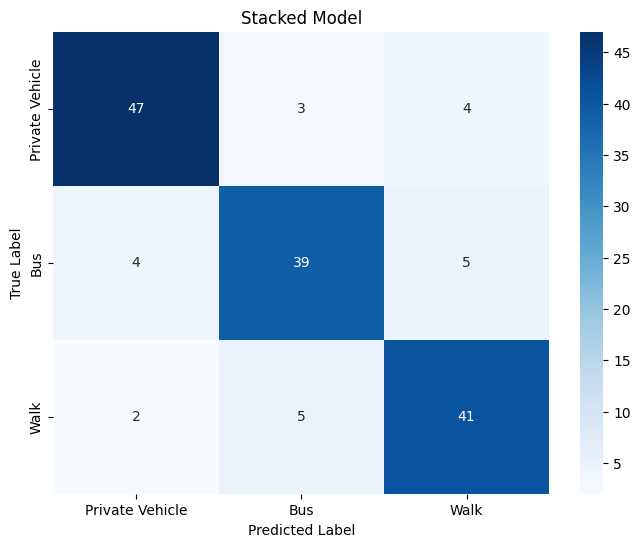

In [323]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

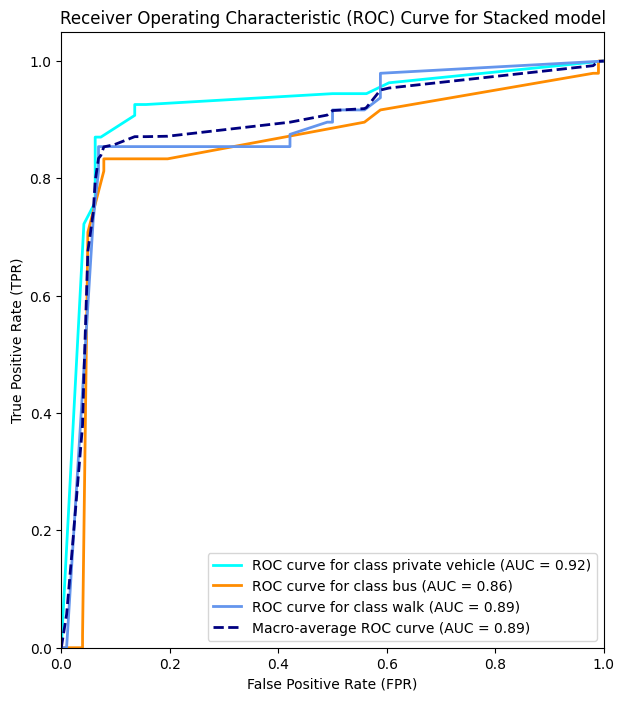

In [324]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [325]:
roc_auc["macro"]

0.8892200832879449